In [ ]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from src.features import build_feature_table

df_train = pd.read_csv("../data/processed/train_parsed.csv")
df_test = pd.read_csv("../data/processed/test_parsed.csv")

df = pd.concat([df_train, df_test], ignore_index=True)
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp").set_index("timestamp")


print(df.index.min(), "->", df.index.max())

1995-07-01 00:00:01-04:00 -> 1995-08-31 23:59:53-04:00


In [3]:
metrics = build_feature_table(df, freq="1min")
metrics.head()

,requests,bytes,error_rate,req_lag_1,bytes_lag_1,err_lag_1,req_lag_5,bytes_lag_5,err_lag_5,req_lag_10,...,err_roll_5,hour,dayofweek,is_weekend,requests_future_1,requests_future_5,requests_future_15,bytes_future_1,bytes_future_5,bytes_future_15
timestamp,,,,,,,,,,,,,,,,,,,,,
1995-07-01 00:10:00-04:00,51,563959,0.039216,46.0,681950.0,0.000000,54.0,933859.0,0.0,42.0,...,0.007843,0,5,1,71.0,5.0,62.0,1453436.0,44218.0,737964.0
1995-07-01 00:11:00-04:00,71,1453436,0.000000,51.0,563959.0,0.039216,52.0,1153891.0,0.0,61.0,...,0.007843,0,5,1,56.0,82.0,74.0,813448.0,1172487.0,2293116.0
1995-07-01 00:12:00-04:00,56,813448,0.000000,71.0,1453436.0,0.000000,68.0,1157827.0,0.0,57.0,...,0.007843,0,5,1,44.0,52.0,85.0,2729421.0,1602189.0,1008559.0
1995-07-01 00:13:00-04:00,44,2729421,0.000000,56.0,813448.0,0.000000,47.0,1113516.0,0.0,71.0,...,0.007843,0,5,1,20.0,63.0,68.0,551582.0,777872.0,888624.0
1995-07-01 00:14:00-04:00,20,551582,0.100000,44.0,2729421.0,0.000000,46.0,681950.0,0.0,70.0,...,0.027843,0,5,1,5.0,80.0,55.0,44218.0,962982.0,1295664.0


In [4]:
metrics.columns.tolist()

['requests',
 'bytes',
 'error_rate',
 'req_lag_1',
 'bytes_lag_1',
 'err_lag_1',
 'req_lag_5',
 'bytes_lag_5',
 'err_lag_5',
 'req_lag_10',
 'bytes_lag_10',
 'err_lag_10',
 'req_roll_5',
 'req_roll_10',
 'bytes_roll_5',
 'err_roll_5',
 'hour',
 'dayofweek',
 'is_weekend',
 'requests_future_1',
 'requests_future_5',
 'requests_future_15',
 'bytes_future_1',
 'bytes_future_5',
 'bytes_future_15']

In [5]:
metrics.to_csv("../data/processed/metrics_full.csv")
print("Saved metrics_full.csv", metrics.shape)

Saved metrics_full.csv (89255, 25)


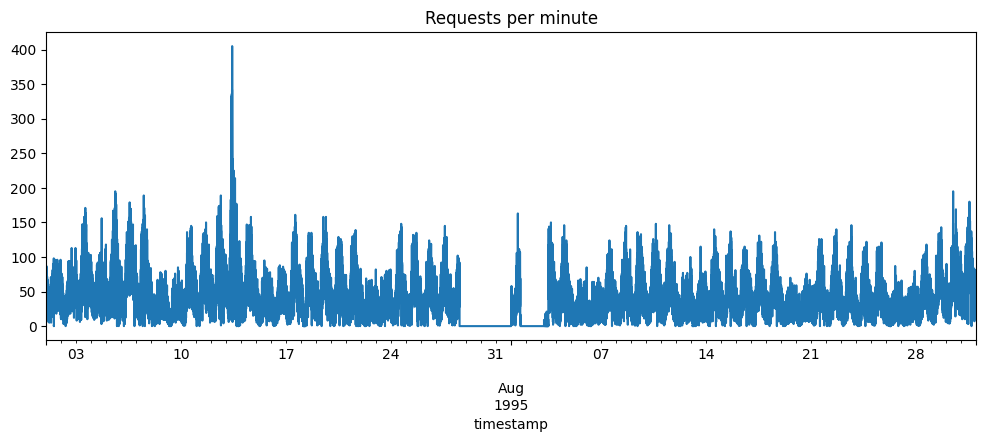

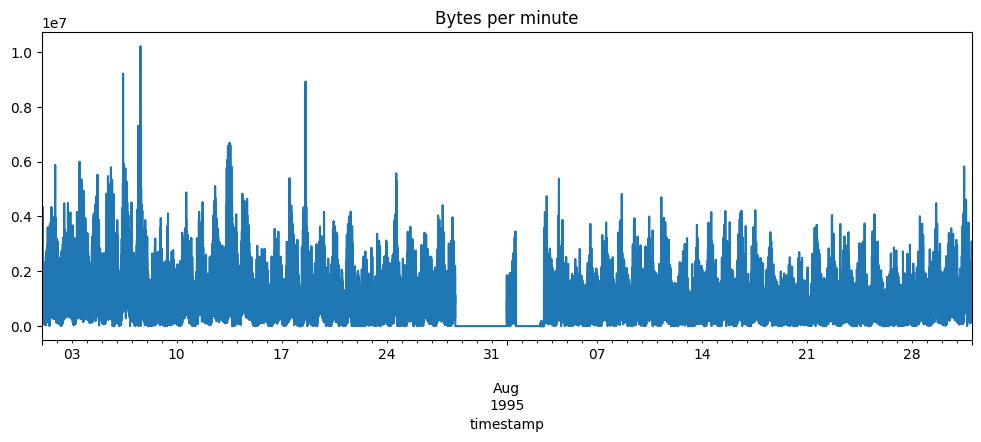

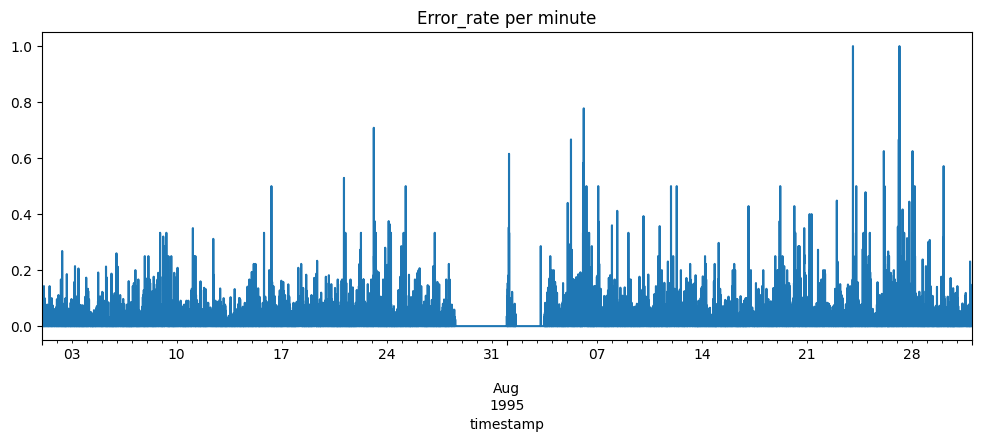

In [8]:
import matplotlib.pyplot as plt


metrics["requests"].plot(figsize=(12,4), title="Requests per minute")
plt.show()
metrics["bytes"].plot(figsize=(12,4), title="Bytes per minute")
plt.show()
metrics["error_rate"].plot(figsize=(12,4), title="Error_rate per minute")
plt.show()